In [2]:
# Nhập thư viện 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Đọc dữ liệu 
df = pd.read_excel('CVD.xlsx')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


Text(0.5, 1.0, 'BMI Distribution')

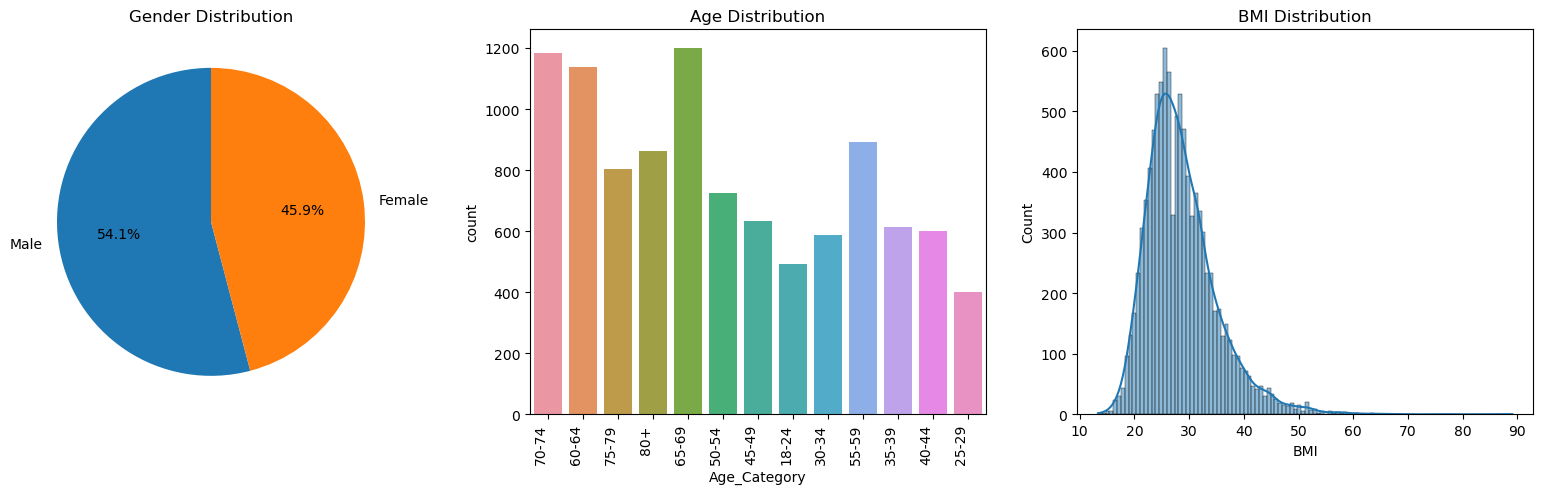

In [4]:
# Trực quan một số thuộc tính trong DataFrame.
fig, ax = plt.subplots(1,3,figsize=(20, 5))
# Tròn
ax[0].pie(df['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
# Cột
sns.countplot(x = 'Age_Category', data = df, ax = ax[1]).set_title('Age Distribution')
# Histogram
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True).set_title('BMI Distribution')

Text(0.5, 1.0, 'BMI Distribution and Heart Disease')

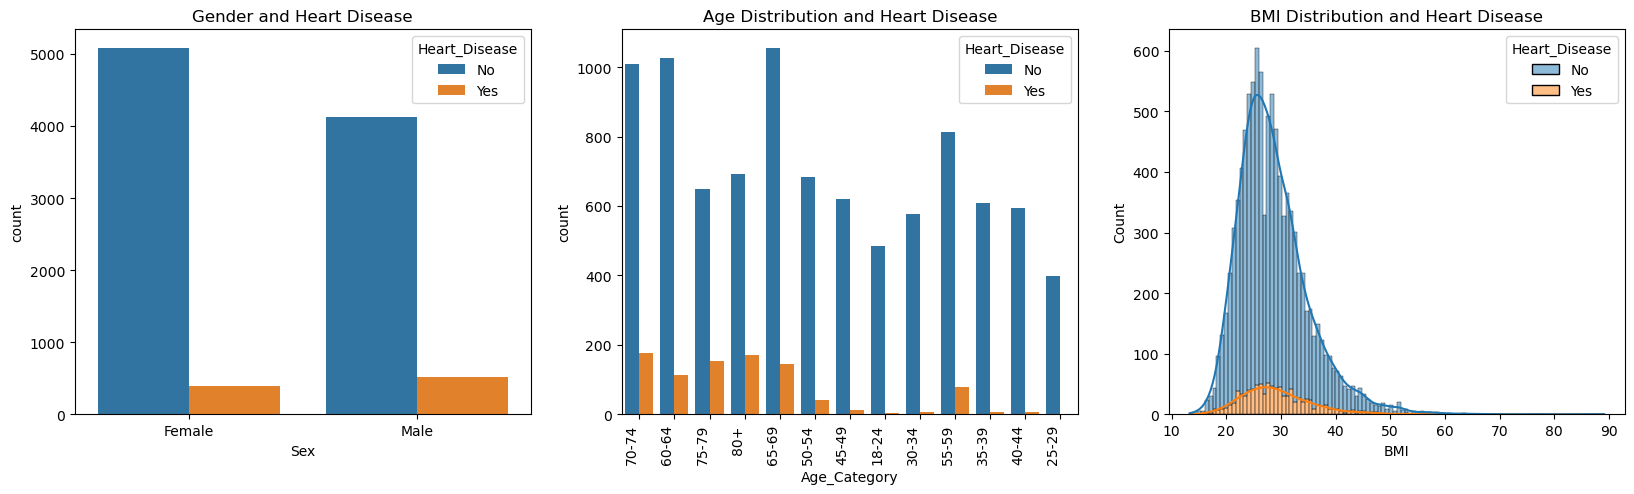

In [5]:
# Trực quan mối quan hệ giữa các thuộc tính 'Sex', 'Age_Category', 'BMI' và 'Heart_Disease'
fig, ax = plt.subplots(1,3,figsize=(20, 5))
# Đồ thị cột (Count plot) cho mối quan hệ giữa 'Gender' và 'Heart_Disease'
sns.countplot(x = 'Sex', data = df, hue  = 'Heart_Disease', ax = ax[0]).set_title('Gender and Heart Disease')
# Đồ thị cột (Count plot) cho mối quan hệ giữa 'Age_Category' và 'Heart_Disease':
sns.countplot(x = 'Age_Category', data = df, ax = ax[1], hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
# Đồ thị histogram (Histogram) cho mối quan hệ giữa 'BMI' và 'Heart_Disease'
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

XỬ LÝ DỮ LIỆU

Các bước kiểm tra

In [6]:
# Kiểm tra thông tin của DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10133 entries, 0 to 10132
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                10133 non-null  object 
 1   Checkup                       10133 non-null  object 
 2   Exercise                      10133 non-null  object 
 3   Heart_Disease                 10133 non-null  object 
 4   Skin_Cancer                   10133 non-null  object 
 5   Other_Cancer                  10133 non-null  object 
 6   Depression                    10133 non-null  object 
 7   Diabetes                      10133 non-null  object 
 8   Arthritis                     10133 non-null  object 
 9   Sex                           10133 non-null  object 
 10  Age_Category                  10133 non-null  object 
 11  Height_(cm)                   10133 non-null  int64  
 12  Weight_(kg)                   10133 non-null  float64
 13  B

In [7]:
# Kiểm tra hình dạng DataFrame
df.shape

(10133, 19)

In [8]:
# Kiểm tra giá trị thiếu
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [9]:
# Kiểm tra kiểu dữ liệu
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [10]:
# Đếm số lượng các hàng trùng lặp
df.duplicated().sum()

0

In [11]:
# Đếm số lượng giá trị duy nhất của toàn bộ DataFrame
df.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       43
Weight_(kg)                      282
BMI                             1524
Smoking_History                    2
Alcohol_Consumption               29
Fruit_Consumption                 40
Green_Vegetables_Consumption      43
FriedPotato_Consumption           38
dtype: int64

In [12]:
# Xóa cột
df.drop(columns=['Weight_(kg)', 'Height_(cm)'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10133 entries, 0 to 10132
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                10133 non-null  object 
 1   Checkup                       10133 non-null  object 
 2   Exercise                      10133 non-null  object 
 3   Heart_Disease                 10133 non-null  object 
 4   Skin_Cancer                   10133 non-null  object 
 5   Other_Cancer                  10133 non-null  object 
 6   Depression                    10133 non-null  object 
 7   Diabetes                      10133 non-null  object 
 8   Arthritis                     10133 non-null  object 
 9   Sex                           10133 non-null  object 
 10  Age_Category                  10133 non-null  object 
 11  BMI                           10133 non-null  float64
 12  Smoking_History               10133 non-null  object 
 13  A

In [14]:
# Loại bỏ các giá trị ngoại lệ (outliers)
cols  = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Tính các giá trị Q1 và Q3 
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

# Tính phạm vi nội tâm (IQR) cho mỗi cột
IQR = Q3 - Q1

# Xác định ngưỡng cho việc xác định ngoại lệ
threshold = 1.5

# Tìm các chỉ mục của các giá trị ngoại lệ trong DataFrame
index = np.where((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR)))[0]

# Loại bỏ
df = df.drop(df.index[index])

In [15]:
# Thay thế các giá trị trong cột 'Diabetes' 
# 'No, pre-diabetes or borderline diabetes' được thay thế bằng 'Pre-Diabetes'.
# 'Yes, but female told only during pregnancy' được thay thế bằng 'Gestational Diabetes'.
# 'Yes' và 'No' không thay đổi.
df['Diabetes'] = df['Diabetes'].map({'No, pre-diabetes or borderline diabetes': 'Pre-Diabetes' ,'Yes, but female told only during pregnancy' : 'Gestational Diabetes', 'Yes': 'Yes', 'No': 'No'})

In [16]:
# Chọn các cột có kiểu dữ liệu là 'object' hoặc 'category'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# In ra tên các cột phân loại
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')


In [17]:
# Chuyển đổi các cột phân loại (categorical variables) trong DataFrame thành dạng số nguyên.

cols = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis',	'Sex',	'Age_Category', 'Smoking_History']

le = LabelEncoder()

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

General_Health [3 4 2 1 0]
Checkup [2 4 0 3 1]
Exercise [0 1]
Heart_Disease [0 1]
Skin_Cancer [0 1]
Other_Cancer [0 1]
Depression [0 1]
Diabetes [1 3 2 0]
Arthritis [1 0]
Sex [0 1]
Age_Category [10  8 11 12  9  6  5  2  7  0  3  4  1]
Smoking_History [1 0]


In [18]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,1,1,0,10,14.54,1,0,30,16,12
1,4,4,0,1,0,0,0,3,0,0,10,28.29,0,0,30,0,4
2,4,4,1,0,0,0,0,3,0,0,8,33.47,0,4,12,3,16
3,3,4,1,1,0,0,0,3,0,1,11,28.73,0,0,30,30,8
4,2,4,0,0,0,0,0,1,0,1,12,24.37,1,0,8,4,0


<AxesSubplot:>

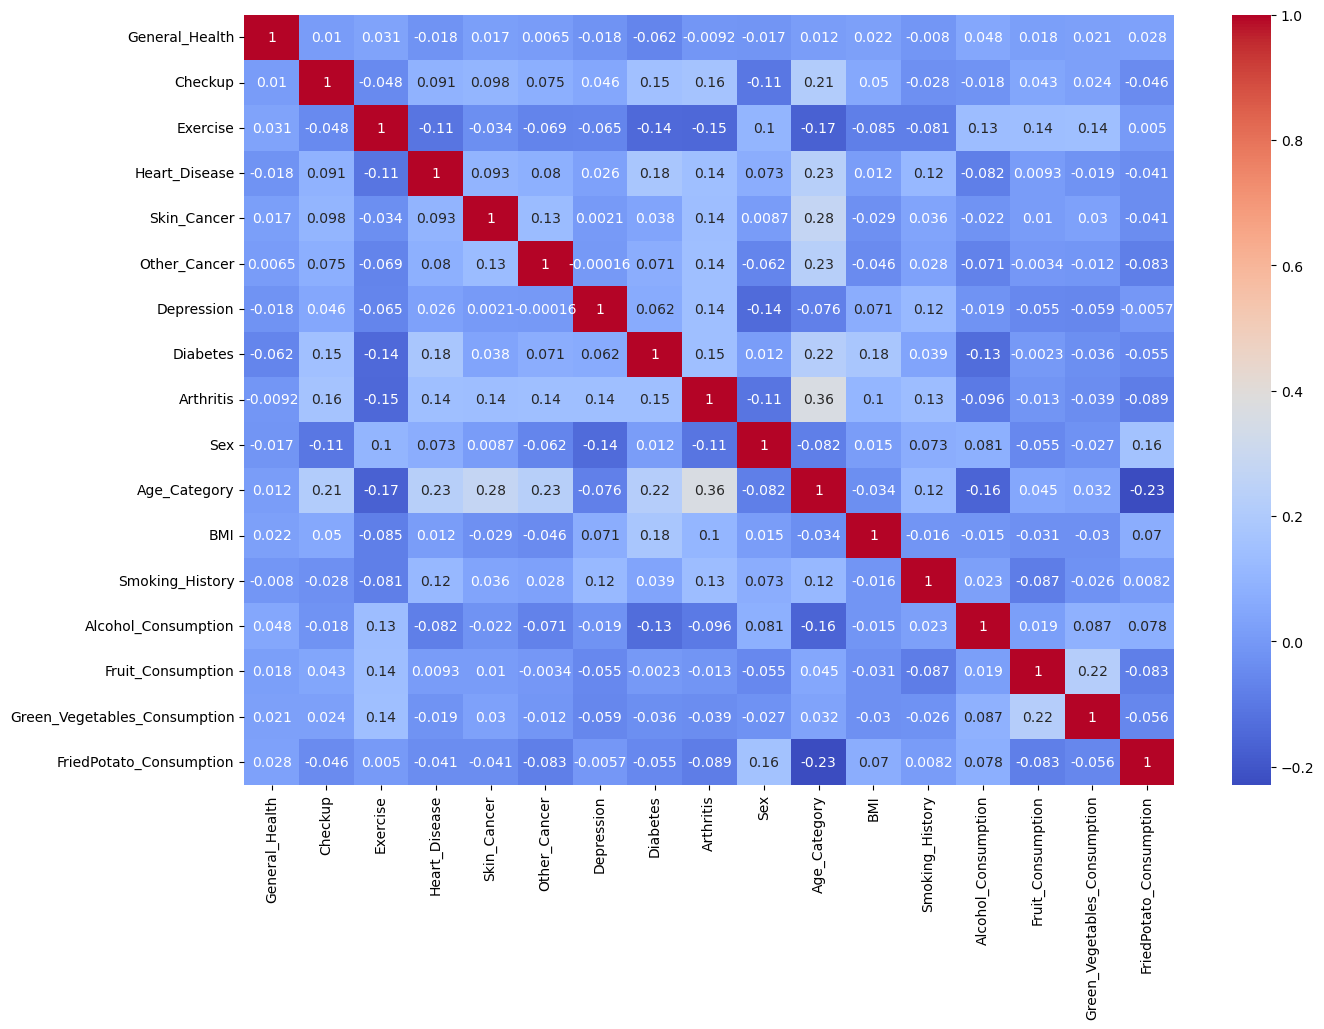

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [20]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Heart_Disease']), df['Heart_Disease'], test_size = 0.2, random_state = 0)

In [21]:
# Sử dụng Lazypredict để tạo mô hình
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# In ra danh sách các mô hình và kết quả dự đoán
print(models)
print(predictions)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:07<00:00,  3.84it/s]

[LightGBM] [Info] Number of positive: 456, number of negative: 4449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 4905, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.092966 -> initscore=-2.277942
[LightGBM] [Info] Start training from score -2.277942
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.71               0.72     0.72      0.76   
GaussianNB                         0.81               0.63     0.63      0.82   
QuadraticDiscriminantAnalysis      0.83               0.63     0.63      0.84   
DecisionTreeClassifier             0.83   

TOP 1: RandomForestClassifier

In [22]:
# Huấn luyện và đánh giá mô hình
# Tạo đối tượng
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')

# Huấn luyện
rfc.fit(X_train, y_train)

# Độ chính xác trên tập huấn luyện
rfc.score(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
rfc_pred = rfc.predict(X_test)

print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, rfc_pred))
print('Precision Score: ', precision_score(y_test, rfc_pred))
print('Recall Score: ', recall_score(y_test, rfc_pred))
print('F1 Score: ', f1_score(y_test, rfc_pred))

Random Forest
Accuracy Score:  0.8777506112469438
Precision Score:  1.0
Recall Score:  0.006622516556291391
F1 Score:  0.013157894736842105


Feature Importance giúp hiểu rõ hơn về mức độ quan trọng của từng đặc trưng trong mô hình.

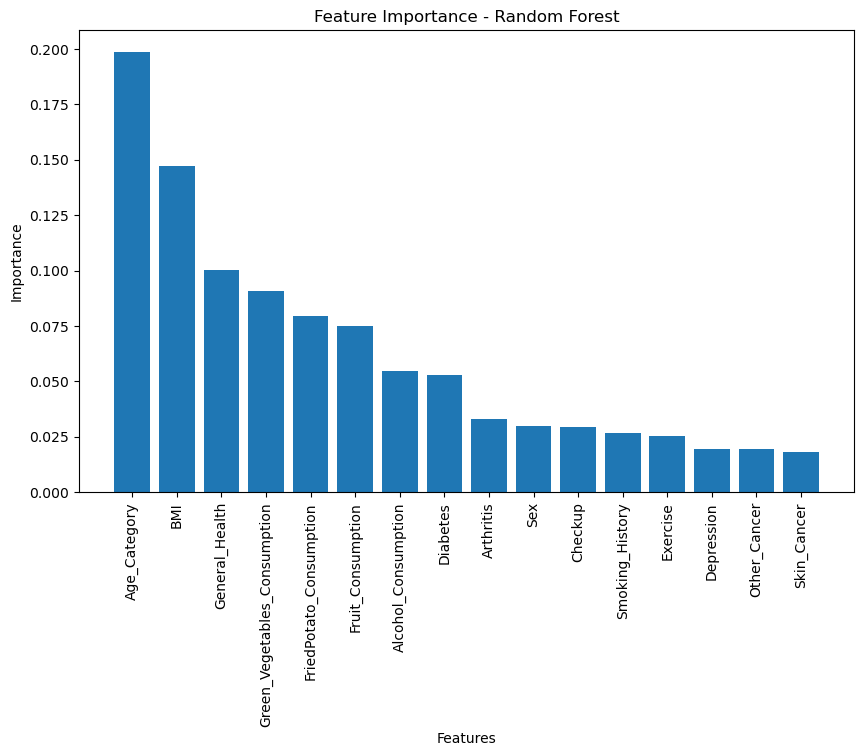

In [23]:
# Trích xuất độ quan trọng của các đặc trưng
importances = rfc.feature_importances_

# Sắp xếp độ quan trọng theo thứ tự giảm dần
indices = np.argsort(importances)[::-1]

# Vẽ biểu đồ cột của độ quan trọng
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features') 
plt.ylabel('Importance')
plt.show()

MÔ HÌNH LOGISTIC REGRESSION

In [24]:
# Khởi tạo và huấn luyện mô hình
lr = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
lr.fit(X_train, y_train)

# Độ chính xác trên tập huấn luyện
lr.score(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
lr_pred = lr.predict(X_test)

print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, lr_pred))
print('Precision Score: ', precision_score(y_test, lr_pred))
print('Recall Score: ', recall_score(y_test, lr_pred))
print('F1 Score: ', f1_score(y_test, lr_pred))

Logistic Regression
Accuracy Score:  0.8736756316218419
Precision Score:  0.25
Recall Score:  0.013245033112582781
F1 Score:  0.025157232704402514


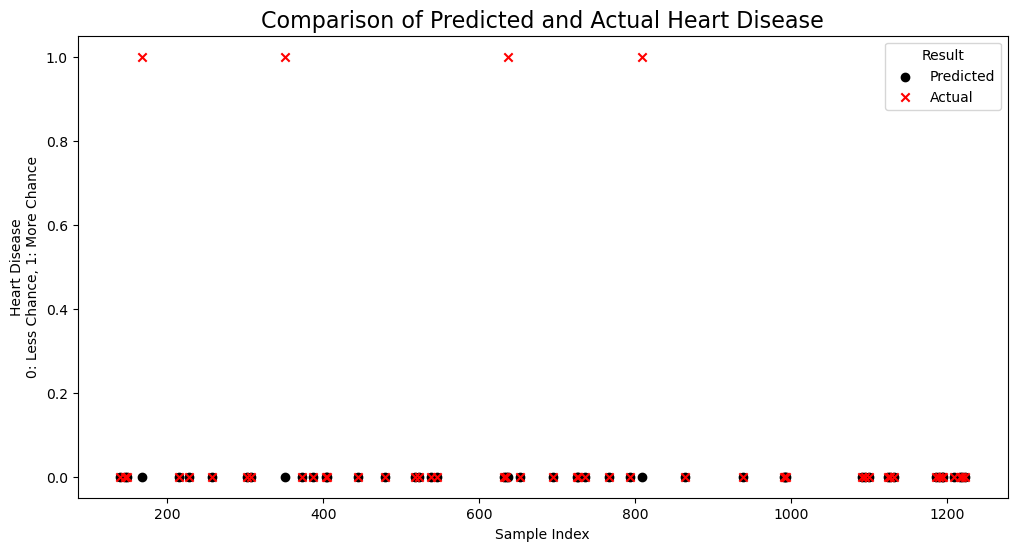

In [25]:
# Số lượng điểm muốn hiển thị
num_points_to_display = 50

# Lựa chọn ngẫu nhiên một số lượng điểm từ dữ liệu
random_indices = np.random.choice(len(lr_pred), num_points_to_display, replace=False)

# Tạo biểu đồ với các điểm được chọn ngẫu nhiên
plt.figure(figsize=(12, 6))
plt.scatter(random_indices, lr_pred[random_indices], color="black", label="Predicted")
plt.scatter(random_indices, y_test.values[random_indices], color="red", marker="x", label="Actual")
plt.title("Comparison of Predicted and Actual Heart Disease", fontsize=16)
plt.xlabel("Sample Index")
plt.ylabel("Heart Disease\n0: Less Chance, 1: More Chance")
plt.legend(title="Result")
plt.show()


In [26]:
# Khởi tạo mô hình Linear Regression
linear_reg_model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
linear_reg_model.fit(X_train, y_train)

# Độ chính xác trên tập huấn luyện
linear_reg_model.score(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred_linear_reg = linear_reg_model.predict(X_test)

# In các giá trị độ đo hiệu suất
print('Linear Regression Performance Metrics:')
print('Mean Squared Error (MSE): ', mean_squared_error(y_test, y_pred_linear_reg))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred_linear_reg))
print('R-squared (R2) Score: ', r2_score(y_test, y_pred_linear_reg))

Linear Regression Performance Metrics:
Mean Squared Error (MSE):  0.09595550450541138
Mean Absolute Error (MAE):  0.18404446628939794
R-squared (R2) Score:  0.11086071332056757


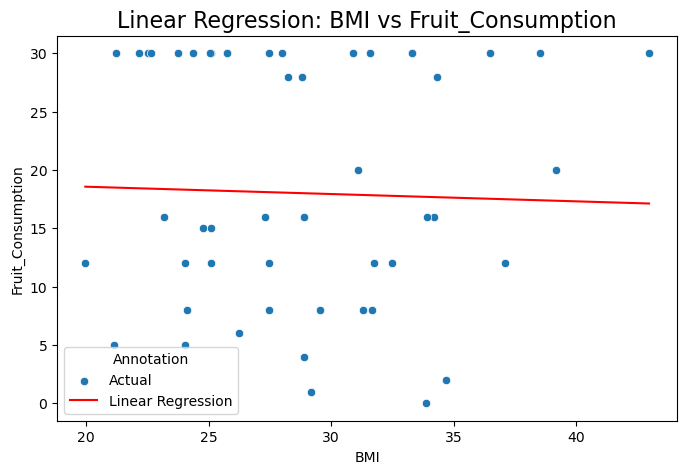

In [27]:
df_sorted = df.sort_values(by='BMI')

# Lấy dữ liệu
X_bmi_lnr = df_sorted['BMI'].values.reshape(-1, 1)
y_Fruit_Consumption_lnr = df_sorted['Fruit_Consumption'].values

# Huấn luyện mô hình Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_bmi_lnr, y_Fruit_Consumption_lnr)

# Dự đoán giá trị
y_pred_Fruit_Consumption = model_linear.predict(X_bmi_lnr)

import random

# Số lượng điểm muốn hiển thị
num_points_to_display = 50

# Lựa chọn ngẫu nhiên một số lượng điểm từ dữ liệu
random_indices = random.sample(range(len(X_bmi_lnr)), num_points_to_display)

# Tạo biểu đồ với các điểm được chọn ngẫu nhiên
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_bmi_lnr.flatten()[random_indices], y=y_Fruit_Consumption_lnr[random_indices], label='Actual')
sns.lineplot(x=X_bmi_lnr.flatten()[random_indices], y=y_pred_Fruit_Consumption[random_indices], color='red', label='Linear Regression')
plt.title('Linear Regression: BMI vs Fruit_Consumption', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Fruit_Consumption')
plt.legend(title='Annotation')
plt.show()

In [32]:
# Khởi tạo mô hình SVM
svm_model = SVC(kernel='linear', C=1.0)

# Huấn luyện mô hình trên tập huấn luyện
svm_model.fit(X_train, y_train)

# Dự đoán lớp trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# In kết quả
print(f"Accuracy (SVM): {accuracy_svm:.2f}")
print("Classification Report (SVM):\n", report_svm)

Accuracy (SVM): 0.88
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1076
           1       0.00      0.00      0.00       151

    accuracy                           0.88      1227
   macro avg       0.44      0.50      0.47      1227
weighted avg       0.77      0.88      0.82      1227



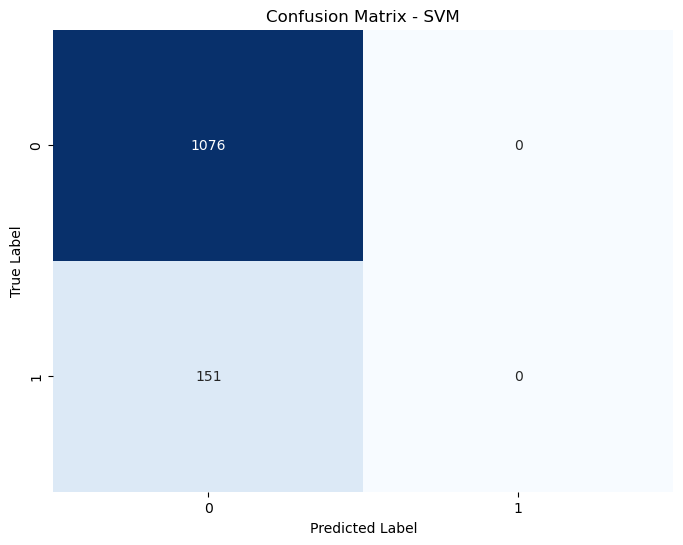

In [29]:
# Ma trận nhầm lẫn
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [30]:
# Chuyển đổi dữ liệu thành kiểu numpy array và kiểu số thực (float)
X_train = X_train.values.astype(float)
X_test = X_test.values.astype(float)

# Khởi tạo mô hình KNN
knn_model = KNeighborsClassifier()

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# In kết quả
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1076
           1       0.14      0.01      0.02       151

    accuracy                           0.87      1227
   macro avg       0.51      0.50      0.48      1227
weighted avg       0.79      0.87      0.82      1227



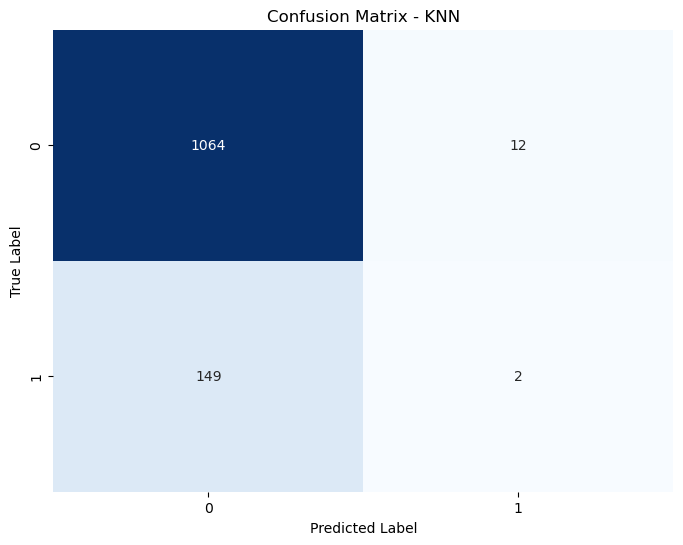

In [31]:
# Ma trận nhầm lẫn
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
